In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn.exceptions
!pip install -q sklearn
from sklearn import preprocessing
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
!pip install kmodes
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import classification_report
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score

In [2]:
sns.set(font_scale=1.5)


### Question 1:
Determine the number of subgroups from the dataset using attributes 3 to 205 i.e., exclude attributes 1, 2 and 206. Is this number same as number of classes presented by attribute 206? Explain and justify your findings.

In [3]:
scadidf = pd.read_csv("SCADI.csv")

In [4]:
scadidf

,Gender,Age,d 5100-0,d 5100-1,d 5100-2,d 5100-3,d 5100-4,d 5100-8,d 5100-9,d 5101-0,...,d 57022-8,d 57022-9,d 571-0,d 571-1,d 571-2,d 571-3,d 571-4,d 571-8,d 571-9,Classes
0,0,18,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,class6
1,0,22,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,class6
2,0,18,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,class6
3,1,18,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,class6
4,0,19,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,class6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,1,15,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,class4
66,0,9,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,class3
67,1,8,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,class6
68,1,8,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,class6


In [5]:
scadidf2 = scadidf.iloc[:,2:205]
scadidf2

,d 5100-0,d 5100-1,d 5100-2,d 5100-3,d 5100-4,d 5100-8,d 5100-9,d 5101-0,d 5101-1,d 5101-2,...,d 57022-4,d 57022-8,d 57022-9,d 571-0,d 571-1,d 571-2,d 571-3,d 571-4,d 571-8,d 571-9
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
66,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
67,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
68,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [6]:
print(scadidf2.isnull().sum())

d 5100-0    0
d 5100-1    0
d 5100-2    0
d 5100-3    0
d 5100-4    0
           ..
d 571-2     0
d 571-3     0
d 571-4     0
d 571-8     0
d 571-9     0
Length: 203, dtype: int64


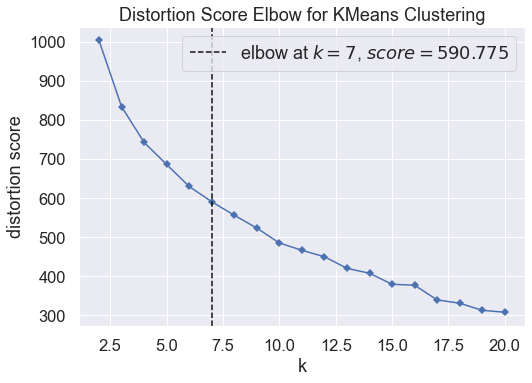

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(scadidf2)
scadidf2 = mms.transform(scadidf2)

numclus = KMeans()
visualizer = KElbowVisualizer(numclus, k=(2,21), timings= False)
visualizer.fit(scadidf2)
visualizer.show()

<function matplotlib.pyplot.show(close=None, block=None)>

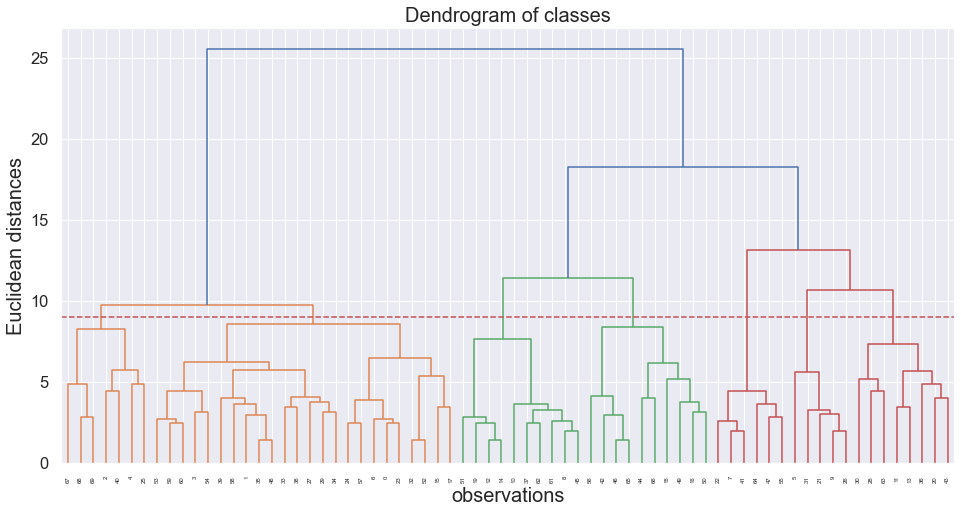

In [8]:
plt.figure(figsize=(16,8))
dendogram = sch.dendrogram(sch.linkage(scadidf2, method = 'ward'))
plt.axhline(y=9, color='r', linestyle='--')
plt.title('Dendrogram of classes', fontsize=20)
plt.xlabel('observations', fontsize=20)
plt.ylabel('Euclidean distances',fontsize=20)

plt.show

In [9]:
print("number of classes in original dataset is "+ str(len(scadidf.Classes.unique())))

number of classes in original dataset is 7


I've done 2 different methods to identify the number of K, the elbow method varies between 7-9 each time I run it, dendrogram is showing that there are 7 clusters. So yes this matches the number of classes in the dataset supplied.

### Question 2:

Is this data facing curse of dimensionality? If so, then how to solve this problem. Explain with a two-dimensional plot and report relevant loss of information.


In [10]:
#select features 2 to 205 and assign the class as our label
scadidf3 = scadidf.iloc[:,2:205]
labels = scadidf.iloc[:,-1]

In [11]:
#scale dataset
pcscaled = StandardScaler().fit_transform(scadidf3)

In [12]:
#initiate PCA models with none passed as n_components as this will automatically pick up from dataset
pcamodel = PCA(n_components=None)
pca=pcamodel.fit_transform(pcscaled)
pca.shape

(70, 70)

In [13]:
#calculate expalined variance %
var_ratio = pcamodel.explained_variance_ratio_

for idx, val in enumerate(var_ratio, 1):
    print("Principle component %d: %.2f%%" % (idx, val * 100))
print("total: %.2f%%" % np.sum(var_ratio * 100))

Principle component 1: 18.88%
Principle component 2: 14.03%
Principle component 3: 9.29%
Principle component 4: 5.55%
Principle component 5: 4.62%
Principle component 6: 4.35%
Principle component 7: 3.70%
Principle component 8: 3.13%
Principle component 9: 2.85%
Principle component 10: 2.76%
Principle component 11: 2.54%
Principle component 12: 2.29%
Principle component 13: 2.20%
Principle component 14: 2.00%
Principle component 15: 1.72%
Principle component 16: 1.68%
Principle component 17: 1.49%
Principle component 18: 1.35%
Principle component 19: 1.30%
Principle component 20: 1.21%
Principle component 21: 1.18%
Principle component 22: 0.97%
Principle component 23: 0.86%
Principle component 24: 0.78%
Principle component 25: 0.76%
Principle component 26: 0.71%
Principle component 27: 0.66%
Principle component 28: 0.61%
Principle component 29: 0.59%
Principle component 30: 0.52%
Principle component 31: 0.50%
Principle component 32: 0.47%
Principle component 33: 0.44%
Principle compone

In [14]:
#Calculate cumulative explained variance
cum_var =np.cumsum(pcamodel.explained_variance_ratio_ * 100)
cum_var

array([ 18.88068085,  32.91013012,  42.1958999 ,  47.74616562,
        52.36485609,  56.71211484,  60.41089477,  63.54425436,
        66.39006293,  69.15372562,  71.69531433,  73.98729383,
        76.18493029,  78.18179522,  79.89721566,  81.57939206,
        83.07434695,  84.42459773,  85.72772342,  86.94009784,
        88.1169533 ,  89.08317754,  89.94642602,  90.73099276,
        91.49030033,  92.20239591,  92.858285  ,  93.47124977,
        94.06236776,  94.5799165 ,  95.08356772,  95.54895003,
        95.98847155,  96.39937721,  96.75572785,  97.10428539,
        97.42398759,  97.72129931,  97.96409274,  98.1882909 ,
        98.38947837,  98.58068953,  98.7667376 ,  98.9364502 ,
        99.09322624,  99.21662393,  99.32669239,  99.42113022,
        99.51372327,  99.59317258,  99.66170019,  99.71493845,
        99.76522178,  99.80683991,  99.84314092,  99.87711038,
        99.90193961,  99.92594405,  99.94288488,  99.95826941,
        99.97185347,  99.98391245,  99.99196766,  99.99

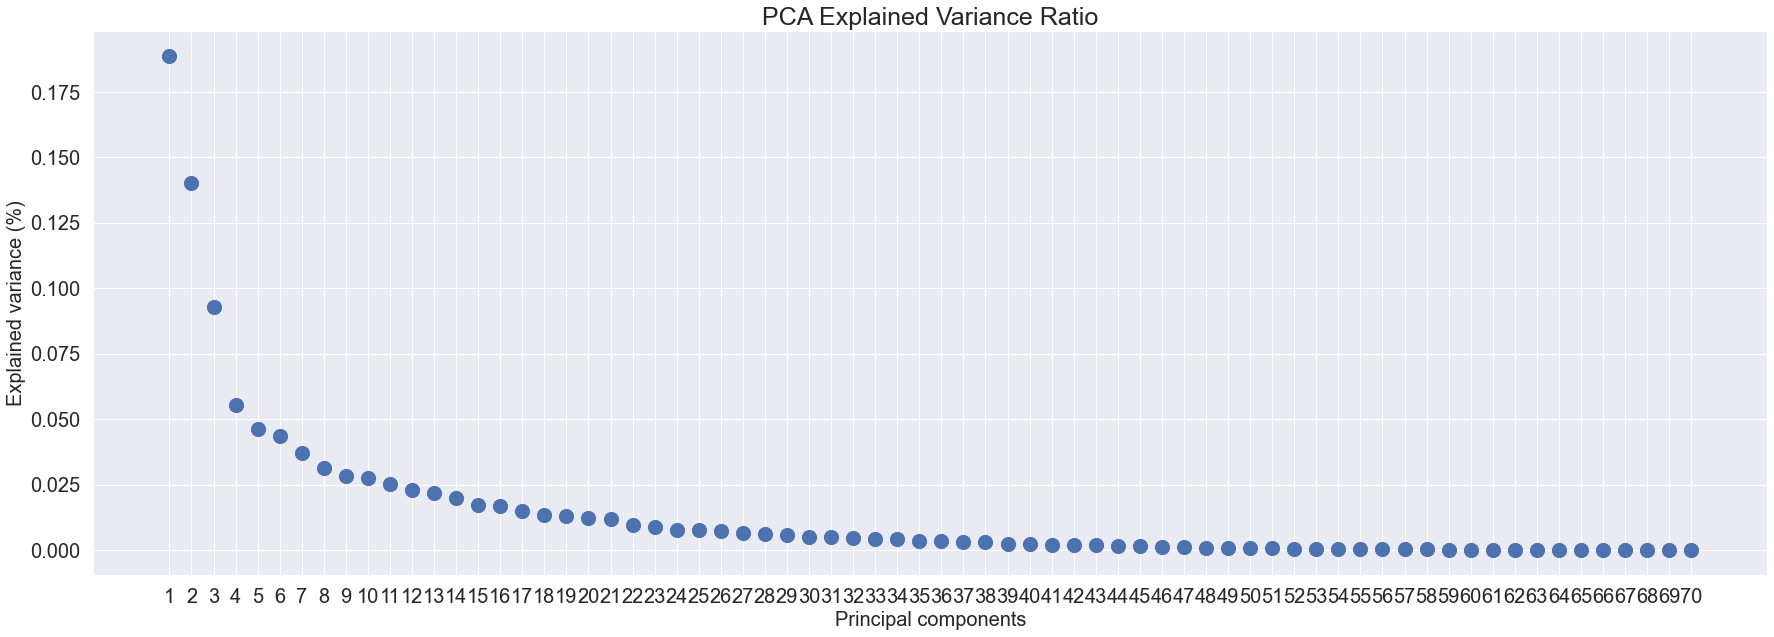

In [15]:
#Plot PCA features and loss of information
plt.figure(figsize = (30,10))
plt.scatter(x=[i+1 for i in range(len(pcamodel.explained_variance_ratio_))],
            y=pcamodel.explained_variance_ratio_,s=200)
           
#plt.grid(True)
plt.title("PCA Explained Variance Ratio",fontsize=25)
plt.xlabel("Principal components",fontsize=20)
plt.xticks([i+1 for i in range(len(pcamodel.explained_variance_ratio_))],fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Explained variance (%)", fontsize=20)
plt.show()



We can see that the first 3 components capture most of the variation in the dataset. So let's proceed to plot a graph with the distribution of the 1st 2 components.

In [16]:
#Transpose data
pca_plt = np.vstack((pca.T, labels)).T

In [17]:
print(pca_plt.shape)

(70, 71)


In [18]:
#create data frame with first 5 components & class column
pca_df=pd.DataFrame(data=pca_plt )
pca_df2= pca_df.iloc[:,:5]
pca_df2 ['Classes']= pca_df.iloc[:,-1]

In [19]:
pca_df2.set_axis(['PC1', 'PC2', 'PC3', 'PC4', 'PC5','Classes'], axis=1, inplace=True)
pca_df2

,PC1,PC2,PC3,PC4,PC5,Classes
0,6.2444,-0.178464,0.511748,-0.991551,0.441427,class6
1,5.05044,0.290823,-0.210469,-0.0406265,3.34657,class6
2,3.62191,-0.79548,0.426424,0.623446,1.74711,class6
3,4.57009,1.72805,-0.879851,0.740737,2.56103,class6
4,2.21518,-0.256316,0.878173,2.21636,5.91559,class6
...,...,...,...,...,...,...
65,-4.21548,-3.96467,-1.41051,-3.66774,0.0511549,class4
66,-5.02206,-3.62704,2.19497,-1.05744,3.45894,class3
67,3.7613,-2.42398,1.54185,2.16772,-3.43865,class6
68,6.19952,-1.08537,1.0126,0.353888,-5.71703,class6


Text(0.5, 1.0, 'Classes by PCA 1 & PCA 2')

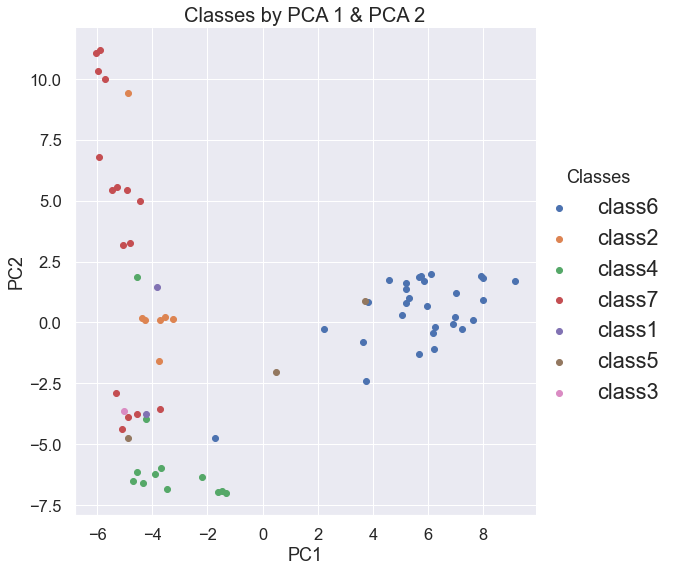

In [20]:
#plot distribution of 1st two components
sns.FacetGrid(pca_df2, hue='Classes', size=8).map(plt.scatter, 'PC1','PC2').add_legend(fontsize = 'large', title_fontsize = "10")
plt.title("Classes by PCA 1 & PCA 2", fontsize=20)


### Question 4:

Create a machine learning (ML) model for predicting “weight” using all features except “NObeyesdad” and report observed performance. Explain your results based on following criteria:

a. What model have you selected for solving this problem and why?

b. Have you made any assumption for the target variable? If so, then why?

c. What have you done with text variables? Explain.

d. Have you optimised any model parameters? What is the benefit of this action?

e. Have you applied any step for handling overfitting or underfitting issue? What is that?

In [21]:
df = pd.read_csv("obesity_levels.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [22]:
df2 = df.drop(['NObeyesdad'], axis=1)

In [23]:
#Finding minimum and maximum values for weight to create weight bins;

min_w = int(np.ceil(df2['Weight'].min()))
max_w = int(np.ceil(df2['Weight'].max()))


print(min_w)
print(max_w)

39
173


In [24]:
#Create weight bins using min and max wieght value:
t_bins = [i for i in range(min_w-9, max_w+20,20)]

print(t_bins)

#attach weight bin to df:
df2['weight_bin'] = pd.cut(x=df2['Weight'], bins=t_bins)
df2.head()

[30, 50, 70, 90, 110, 130, 150, 170, 190]


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,weight_bin
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,"(50, 70]"
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,"(50, 70]"
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,"(70, 90]"
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,"(70, 90]"
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,"(70, 90]"


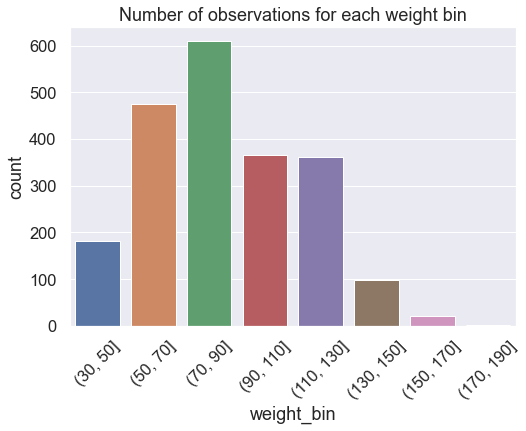

In [25]:
plt.xticks(rotation=45)
barp = sns.countplot(data=df2, x ='weight_bin').set(title="Number of observations for each weight bin")
#We can observe that the dataset is imbalanced as there are more observations for certain weight groups

In [26]:
#Create target variable to use for data comparison
df3 = df2.copy()
Class = df3[['weight_bin', 'Weight']].copy()
Class['weight_bin'] = Class['weight_bin'].astype(str)
df3 = df3.drop(['Weight', 'weight_bin'], axis = 1)

In [27]:
#scaling features using standard scaler and one hot encoding. Creating Y label for comparison later
scaled_features = df3.copy()
numerical = scaled_features.select_dtypes(include = ['int64','float64']).columns
sc = StandardScaler()
scaled_features[numerical] = sc.fit_transform(scaled_features[numerical])


scaled_features=pd.get_dummies(scaled_features)

y_label=Class['weight_bin']


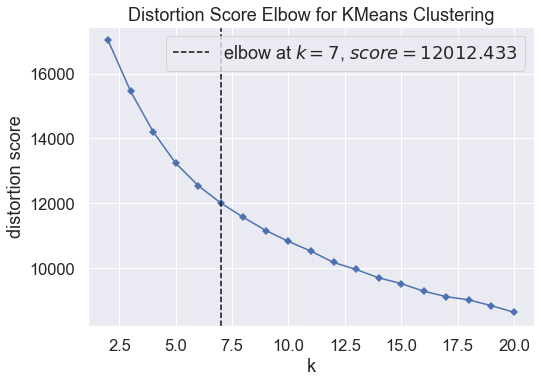

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
#Finding ideal number of clusters
clus = KMeans()
visualizer = KElbowVisualizer(clus, k=(2,21), timings= False)
visualizer.fit(scaled_features)
visualizer.show()

In [29]:
#Running through K means
kmeans = KMeans(random_state=120, n_init=80,init='k-means++',max_iter=500,n_clusters=7)
kmeans_predict = kmeans.fit_predict(scaled_features)
clusters = kmeans.fit_predict(scaled_features)
print("Silhoutte Score is "+ str((silhouette_score(scaled_features, kmeans.labels_))))

from sklearn.metrics.cluster import fowlkes_mallows_score
print("Fowlkes Mallows Score is "+ str((fowlkes_mallows_score(y_label, kmeans.labels_))))




Silhoutte Score is 0.13239531758910356
Fowlkes Mallows Score is 0.244157893495612


In [30]:
#stitch prediction and class back to main df
fin_df = df2.copy()
fin_df['weight_bin'] = Class['weight_bin']
fin_df['y_label'] = y_label
fin_df['Weight'] = Class['Weight']


fin_df['Clusters'] = kmeans_predict

fin_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,weight_bin,y_label,Clusters
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,"(50, 70]","(50, 70]",1
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,"(50, 70]","(50, 70]",4
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,"(70, 90]","(70, 90]",0
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,"(70, 90]","(70, 90]",4
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,"(70, 90]","(70, 90]",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,"(130, 150]","(130, 150]",4
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,"(130, 150]","(130, 150]",4
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,"(130, 150]","(130, 150]",4
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,"(130, 150]","(130, 150]",4


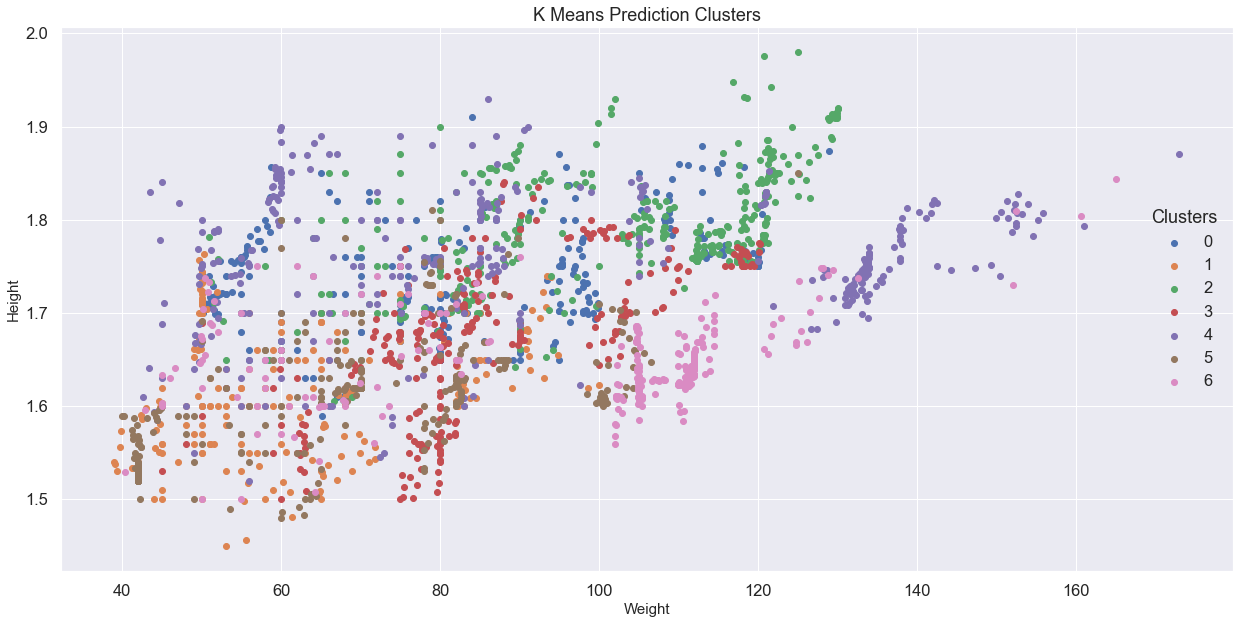

In [31]:
#plot distributions
fig,ax = plt.subplots(figsize=(21,10))
for k,d in fin_df.groupby('Clusters'):
    ax.scatter(d['Weight'], d['Height'], label=k,)
    ax.set_xlabel("Weight", fontsize=15)
    ax.set_ylabel("Height", fontsize=15)
plt.legend(loc='right', bbox_to_anchor=(1.00, 0.5), ncol=1, title='Clusters')
plt.title("K Means Prediction Clusters")

plt.show()

In [32]:
#find average weight for each cluster
fin_df.groupby(['Clusters'])['Weight'].mean()

Clusters
0     83.024084
1     62.657818
2    100.446850
3     86.114084
4     94.037350
5     69.396043
6     96.810588
Name: Weight, dtype: float64

[Text(0.5, 1.0, 'Avg Weight by Clusters')]

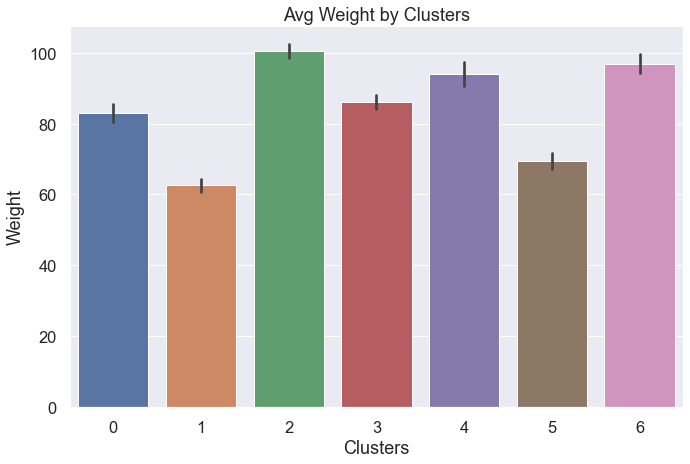

In [33]:
#plot average weight
plt.subplots(figsize = (11,7))
sns.barplot(data=fin_df, x='Clusters', y='Weight', estimator=np.mean).set(title="Avg Weight by Clusters")

[Text(0.5, 1.0, 'Cluster distribution by weight bin')]

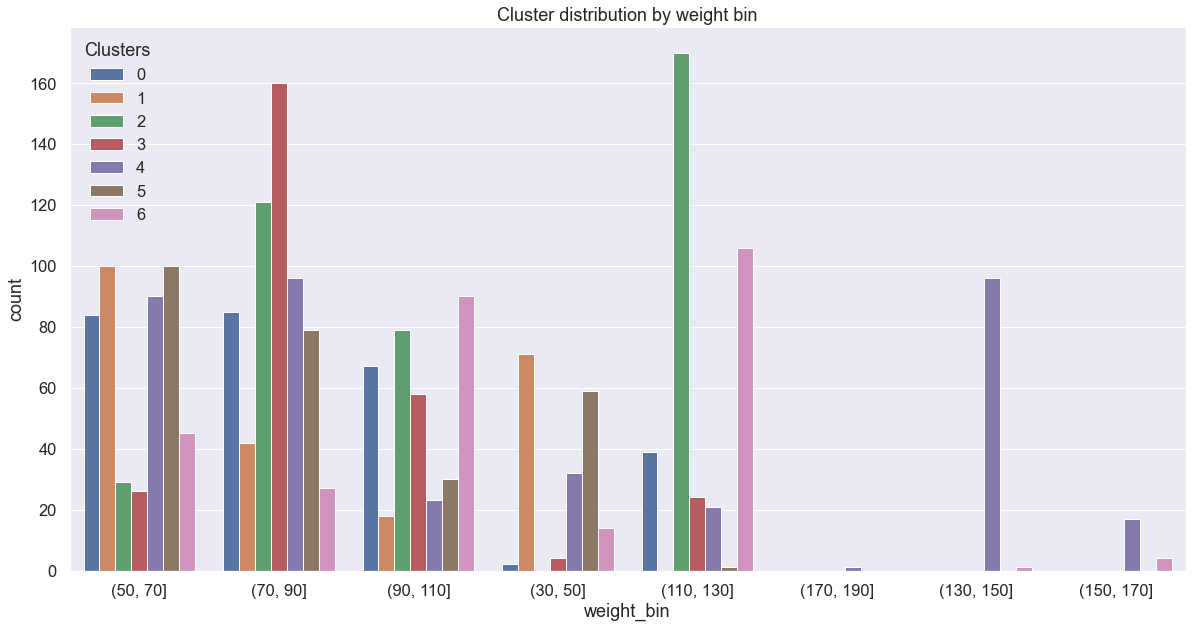

In [34]:
plt.figure(figsize = (20,10))
sns.countplot(x="weight_bin", hue="Clusters", data=fin_df).set(title="Cluster distribution by weight bin")

From the graph above we can see that the clustering isn't great, the clusters are present in most groups. So I will attempt to balance the data and reduce the dimensions to see if we will get a better result.

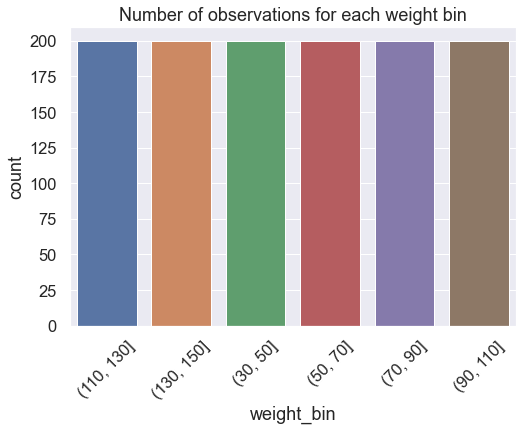

In [35]:
#preprocessing to find weight groups that are not balanced
baldf = df2.copy()

baldf['weight_bin'] = baldf ['weight_bin'].astype(str)
counts2 = baldf['weight_bin'].value_counts()
baldf = baldf.reset_index(drop=True)

#remove observations where there is less than 50 in each weight group & select sample of 200 records for each class
baldf = baldf[~baldf['weight_bin'].isin(counts2[counts2 <= 50].index)]
grouped = baldf.groupby('weight_bin')
baldf = grouped.apply(lambda x: x.sample(n=200, replace=True))

#Visualise balance of each weight group:
plt.xticks(rotation=45)
barp = sns.countplot(data=baldf, x ='weight_bin').set(title="Number of observations for each weight bin")

In [36]:
BalClass = baldf[['weight_bin', 'Weight']].copy()
baldf2 = baldf.drop(['Weight', 'weight_bin'], axis = 1)

In [37]:
#Feature Scaling:
scaled_features2 = baldf2.copy()
numerical2 = scaled_features2.select_dtypes(include=['int64', 'float64']).columns
scaled_features2[numerical2] = sc.fit_transform(scaled_features2[numerical2])

#OHE for categorical features
scaled_features2=pd.get_dummies(scaled_features2)
y_label2 = BalClass['weight_bin']
scaled_features2=scaled_features2.reset_index(drop=True)

In [38]:
#get count of columns to apply to PCA:
X = len(scaled_features2.columns.to_list())
X

29

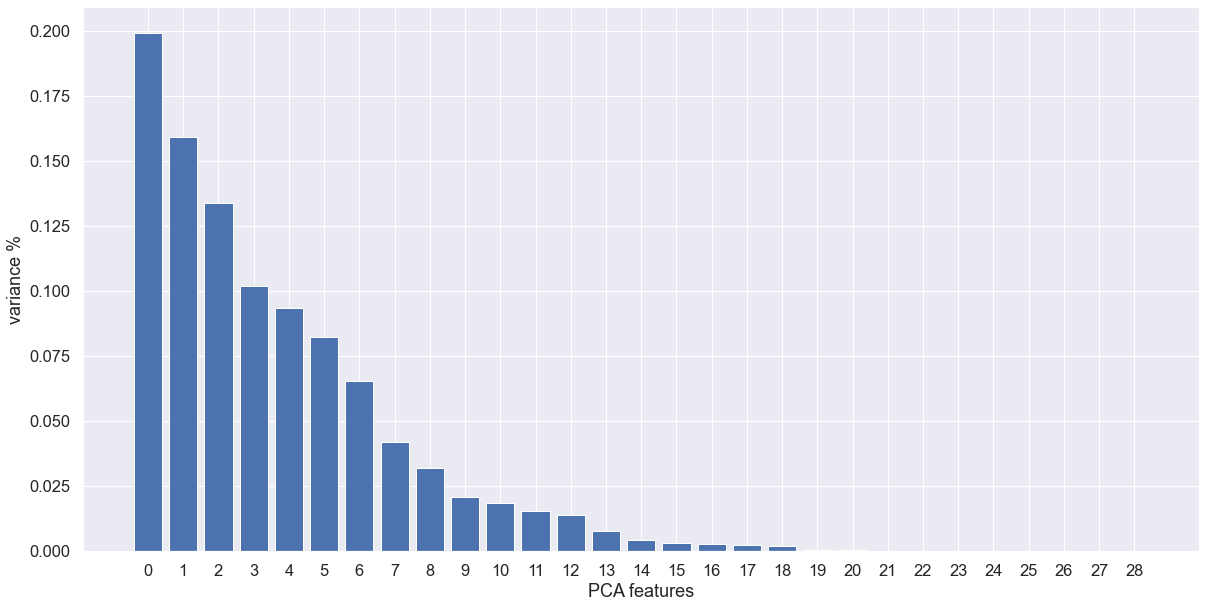

In [39]:
#Perform PCA and Plot feature loss ratio:
pca = PCA(n_components=X)
principalComponents = pca.fit_transform(scaled_features2)

features = range(pca.n_components_)
plt.figure(figsize=(20,10))
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)
var_ratio = pca.explained_variance_ratio_

In [40]:
var_ratio = pca.explained_variance_ratio_

for idx, val in enumerate(var_ratio, 1):
    print("Principle component %d: %.2f%%" % (idx, val * 100))
print("total: %.2f%%" % np.sum(var_ratio * 100))

Principle component 1: 19.94%
Principle component 2: 15.93%
Principle component 3: 13.38%
Principle component 4: 10.21%
Principle component 5: 9.36%
Principle component 6: 8.22%
Principle component 7: 6.54%
Principle component 8: 4.20%
Principle component 9: 3.20%
Principle component 10: 2.05%
Principle component 11: 1.85%
Principle component 12: 1.52%
Principle component 13: 1.37%
Principle component 14: 0.75%
Principle component 15: 0.40%
Principle component 16: 0.32%
Principle component 17: 0.27%
Principle component 18: 0.23%
Principle component 19: 0.19%
Principle component 20: 0.04%
Principle component 21: 0.03%
Principle component 22: 0.00%
Principle component 23: 0.00%
Principle component 24: 0.00%
Principle component 25: 0.00%
Principle component 26: 0.00%
Principle component 27: 0.00%
Principle component 28: 0.00%
Principle component 29: 0.00%
total: 100.00%


In [41]:
cum_var2 =np.cumsum(var_ratio * 100)
cum_var2

array([ 19.93713793,  35.86709348,  49.24433726,  59.4571799 ,
        68.81758791,  77.03390078,  83.57724785,  87.77978763,
        90.97519552,  93.02847245,  94.87911244,  96.39917731,
        97.77212888,  98.52165654,  98.92365871,  99.23975318,
        99.51413702,  99.7432793 ,  99.93048847,  99.97310668,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        ])

From the pca above, we can observe that the first 10 features accounts for over 90% of the explained variance, so let's try Kmeans on just 10 features to see if we get a better result

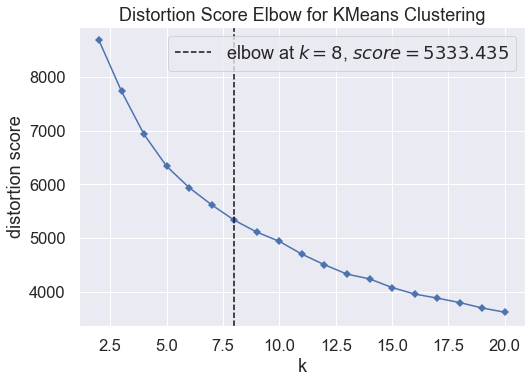

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
clus2 = KMeans()
visualizer = KElbowVisualizer(clus2, k=(2,21), timings= False)
visualizer.fit(PCA_components.iloc[:,:10])
visualizer.show()

In [43]:
#after running PCA, our clusters have increased from 7 to 8
kmeans2 = KMeans(random_state=120, n_init=200,init='k-means++',max_iter=300,n_clusters=7)
kmeans_predict2 = kmeans.fit_predict(PCA_components.iloc[:,:10])
clusters2 = kmeans2.fit_predict(PCA_components.iloc[:,:10])
print("Silhoutte score is "+ str((silhouette_score(PCA_components.iloc[:,:10], kmeans2.labels_))))

print("Fowlkes Mallows Score is "+ str((fowlkes_mallows_score(y_label2, kmeans.labels_))))



Silhoutte score is 0.1862777424613189
Fowlkes Mallows Score is 0.3480886781061343


We can see that there is an improvement in the Fowlkes Mallows Score and Silhoutte Score after balancing the df and running through PCA, so let plot and analyse the data

In [44]:
#Add cluster prediction into df for visualisation
fin_df2 = baldf.copy()

fin_df2['Clusters'] = kmeans_predict2

fin_df2= fin_df2.reset_index(drop=True)
fin_df2

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,weight_bin,Clusters
0,Male,30.628650,1.766975,118.363376,yes,yes,2.964319,3.000000,Sometimes,no,2.377257,no,0.614959,1.875023,Sometimes,Automobile,"(110, 130]",4
1,Male,31.755387,1.775416,121.204668,yes,yes,2.758394,3.000000,Sometimes,no,2.161303,no,0.428173,0.716327,Sometimes,Automobile,"(110, 130]",5
2,Male,30.595632,1.910672,129.232708,yes,yes,2.497548,3.000000,Sometimes,no,1.362583,no,1.144076,0.173232,Sometimes,Public_Transportation,"(110, 130]",6
3,Male,32.290160,1.754956,120.098812,yes,yes,2.967300,3.000000,Sometimes,no,2.530035,no,0.955317,1.339232,Sometimes,Automobile,"(110, 130]",4
4,Male,23.826684,1.783609,120.921535,yes,yes,2.591292,2.956422,Sometimes,no,2.310830,no,1.485240,0.281815,Sometimes,Public_Transportation,"(110, 130]",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Male,18.000000,1.806827,108.829395,yes,yes,2.000000,1.248840,Sometimes,no,2.416213,no,1.000000,1.546738,no,Public_Transportation,"(90, 110]",4
1196,Male,25.447208,1.658910,104.548794,yes,yes,2.859097,1.340361,Sometimes,no,1.530508,no,0.174475,1.261705,no,Public_Transportation,"(90, 110]",0
1197,Male,18.000000,1.844218,109.195529,yes,yes,2.000000,1.548407,Sometimes,no,2.191401,no,1.000000,1.676944,no,Public_Transportation,"(90, 110]",4
1198,Male,22.815416,1.732694,98.441130,yes,yes,2.000000,2.993623,Sometimes,no,2.326635,no,2.236586,1.529423,no,Public_Transportation,"(90, 110]",4


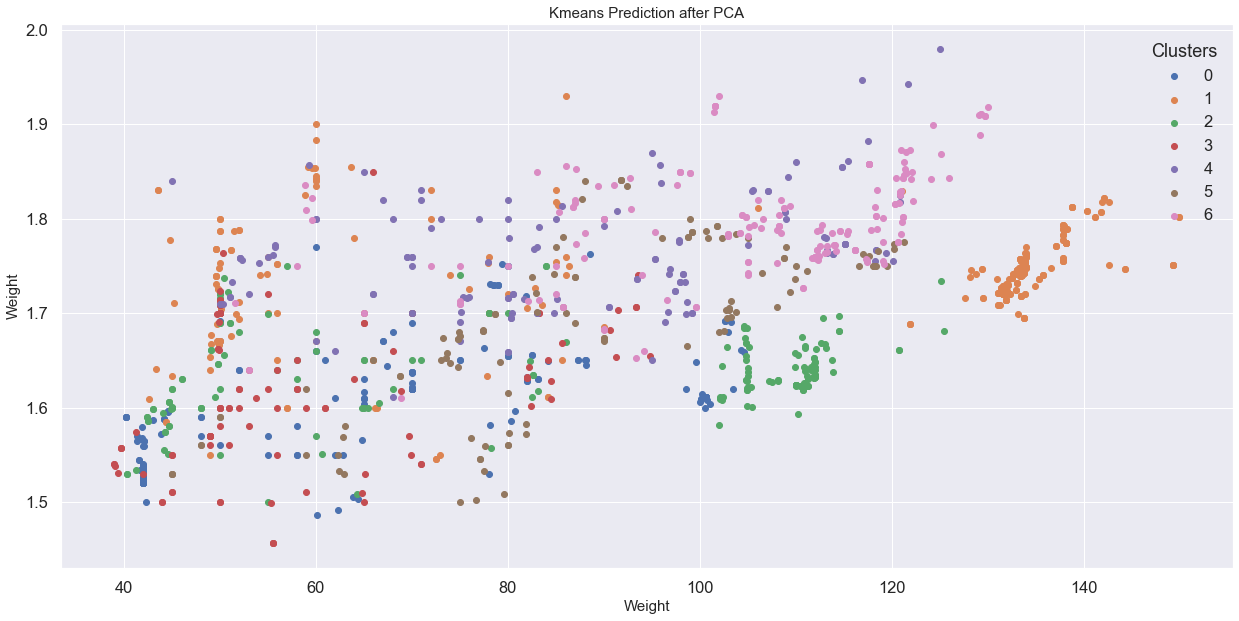

In [45]:
#Plot distrbution after PCA and balancing of dataset
fig,ax = plt.subplots(figsize=(21,10))
for k,d in fin_df2.groupby('Clusters'):
    ax.scatter(d['Weight'], d['Height'], label=k)
    ax.set_xlabel("Weight", fontsize=15)
    ax.set_ylabel("Weight", fontsize=15)
plt.legend(loc='right', bbox_to_anchor=(1.00, 0.8), ncol=1, title='Clusters')
plt.title("Kmeans Prediction after PCA",fontsize=15)
plt.show()

In [46]:
fin_df2.groupby(['Clusters'])['Weight'].mean()

Clusters
0     65.835213
1    110.129196
2     84.960322
3     58.111377
4     86.964009
5     88.077171
6    105.599397
Name: Weight, dtype: float64

[Text(0.5, 1.0, 'Avg Weight by Clusters')]

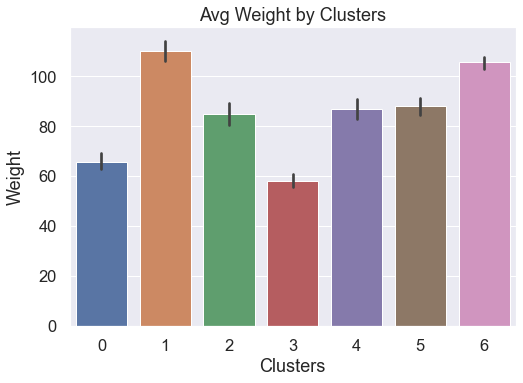

In [47]:
#average weight after PCA and data balance
sns.barplot(data=fin_df2, x='Clusters', y='Weight', estimator=np.mean).set(title="Avg Weight by Clusters")

[Text(0.5, 1.0, 'Cluster distribution by weight bin')]

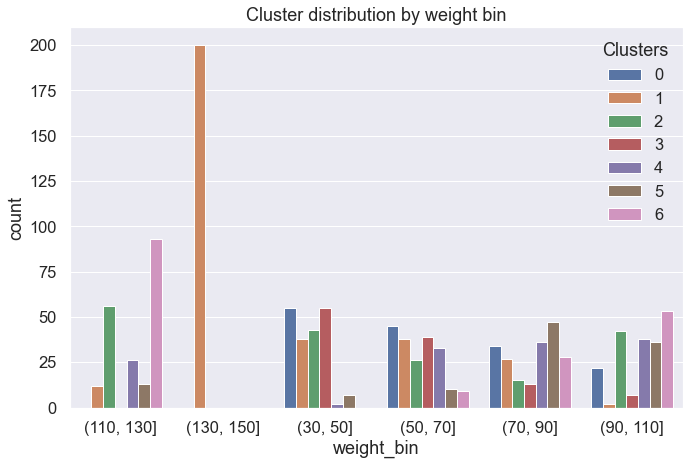

In [48]:
plt.subplots(figsize = (11,7))
sns.countplot(x="weight_bin", hue="Clusters", data=fin_df2).set(title="Cluster distribution by weight bin")

From the graph above, we can see that the clusters are a little better as not all clusters are present in each weight group like what we found prior to doing the PCA - so there is a slight improvement. However, as we can see predicting weight is not suitable using unsupervised methods. For example, cluster 3, the average weight for cluster 3 is 58.11kg, but you can see cluster 3 present in the weight bins of 30-50, 50-70, 60-90 and even 90-110.

# Question 5:
Create a ML model for classifying subjects into two classes applying following constraints on above dataset. 12 marks

• Use “NObeyesdad” as target variable and rest of them as predictor variables.

• drop samples with value “Insufficient Weight” for “NObeyesdad”

• Group Normal Weight, Overweight Level I, and Overweight Level II into a class, and the other three labels (Obesity Type I, II, III) as the other class.

a. Report classification performance scores. Select scores that you think best for describing the model performance with appropriate justification.

b. Have you taken any step to check generalisability of the model? What is that and how it ensures generalisability.

c. Can you design and develop any other model for solving this problem? If so, then why have you used the reported one? Give your justification..

I'm using the Kprototypes Clustering Algorithm as this package has been designed to handle mixed data types of which we do have a mix of categorical and numerical data in our data set

In [49]:
df = pd.read_csv("obesity_levels.csv")
qn5df = df[(df['NObeyesdad'] != 'Insufficient_Weight')]
qn5df['NObeyesdad'].value_counts()


Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Name: NObeyesdad, dtype: int64

In [50]:
#Function to apply 1 to obesity classes and 0 to non obese classes
def n (row):
    if row['NObeyesdad'] == "Normal_Weight":
        val = 0
    elif row['NObeyesdad'] == "Overweight_Level_I":
        val = 0
    elif row['NObeyesdad'] == "Overweight_Level_II":
        val = 0
    else:
        val = 1
    return val

qn5df['NewClass'] = qn5df.apply(n, axis=1)

In [51]:
qn5df2 = qn5df.copy()


In [52]:
#Splitting data into train and test to train model
from sklearn.model_selection import train_test_split
X_train, X_test, = train_test_split(qn5df2,test_size=0.25, random_state=25)


X_test_2 = X_test.copy()
Y_train = X_train[['NewClass']].copy()
Y_test = X_test[['NewClass']].copy()
X_train = X_train.drop(['NObeyesdad', 'NewClass'], axis = 1)
X_test = X_test.drop(['NObeyesdad', 'NewClass'], axis = 1)

y_trainlabel = Y_train['NewClass']
y_testlabel = Y_test['NewClass']

#Identifying location of categorical data as this will be required for the Kmodes prototype algorithm
catColloctrain = [X_train.columns.get_loc(col) for col in list(X_train.select_dtypes(['object', 'category']).columns)]
catColloctest = [X_test.columns.get_loc(col) for col in list(X_test.select_dtypes(['object', 'category']).columns)]

In [53]:
#Scaling numerical data
numlist = X_train.select_dtypes(include = ['int64','float64']).columns
sc = StandardScaler()
X_train[numlist] = sc.fit_transform(X_train[numlist])

X_test[numlist] = sc.fit_transform(X_test[numlist])


In [54]:
#Converting train and test data into matrix to fit into model:
X_testMat = X_test.to_numpy()
X_trainMat = X_train.to_numpy()

In [55]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 11):
    try:
        kprototype = KPrototypes(n_jobs = 2, n_clusters = cluster, init = 'Huang', random_state=0, max_iter=300, n_init=10)
        kprototype.fit_predict(X_trainMat, categorical = catColloctrain)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break


Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9
Cluster initiation: 10


Text(0.5, 1.0, 'Number of clusters')

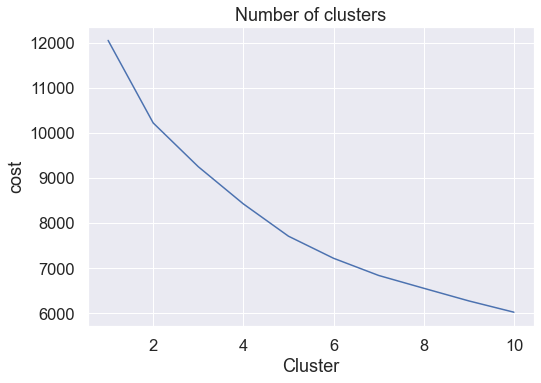

In [56]:
df_cost = pd.DataFrame({'Cluster':range(1, 11), 'cost':cost})
sns.lineplot('Cluster', 'cost', data=df_cost)
plt.title('Number of clusters')

In [57]:
#bend in elbow method is in 2 clusters which fits perfectly with the classification of 2 groups that we have
kprototype = KPrototypes(n_jobs = 2, n_clusters = 2, init = 'Huang', random_state=70, max_iter=100, n_init=10,)
kprototype = kprototype.fit(X_trainMat, categorical = catColloctrain)

predtr = kprototype.fit_predict(X_trainMat, categorical = catColloctrain)
pred = kprototype.fit_predict(X_testMat, categorical = catColloctrain)

In [58]:
print("Testing Results")
print(classification_report(y_testlabel,pred))

print("Training Results")
print(classification_report(y_trainlabel,predtr))

Testing Results
              precision    recall  f1-score   support

           0       0.55      0.70      0.61       207
           1       0.68      0.53      0.59       253

    accuracy                           0.60       460
   macro avg       0.61      0.61      0.60       460
weighted avg       0.62      0.60      0.60       460

Training Results
              precision    recall  f1-score   support

           0       0.59      0.65      0.62       660
           1       0.65      0.58      0.61       719

    accuracy                           0.62      1379
   macro avg       0.62      0.62      0.62      1379
weighted avg       0.62      0.62      0.62      1379



In [59]:
print("Test Fowlkes Mallows Score is "+ str((fowlkes_mallows_score(y_testlabel, pred))))

print('   ')

print("Train Fowlkes Mallows Score is "+ str((fowlkes_mallows_score(y_trainlabel,predtr))))


Test Fowlkes Mallows Score is 0.5275663732557019
   
Train Fowlkes Mallows Score is 0.527780065473605


In [60]:
#Stitching cluster prediction into dataframe for visualisation
X_test_2['NewClass']=Y_test['NewClass']
X_test_2['Prediction']=pred
X_test_2

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,NewClass,Prediction
494,Female,18.000000,1.670000,66.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,0,0
1546,Male,25.298400,1.827279,120.996074,yes,yes,3.000000,3.000000,Sometimes,no,3.000000,no,1.110215,0.396352,Sometimes,Public_Transportation,Obesity_Type_II,1,1
1300,Female,22.591026,1.650012,87.676154,yes,yes,2.983851,1.068443,Sometimes,no,2.854161,no,1.103209,1.000000,no,Public_Transportation,Obesity_Type_I,1,0
1109,Male,37.492444,1.835024,92.368359,yes,yes,2.000000,1.672706,Sometimes,no,2.766674,no,1.000000,0.027093,Sometimes,Automobile,Overweight_Level_II,0,1
110,Male,21.000000,1.750000,75.000000,yes,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643,Male,28.493397,1.817572,120.815800,yes,yes,2.969233,3.000000,Sometimes,no,2.807984,no,0.982134,1.191998,Sometimes,Public_Transportation,Obesity_Type_II,1,1
2036,Female,25.992898,1.638075,105.036522,yes,yes,3.000000,3.000000,Sometimes,no,2.419153,no,0.019404,0.597626,Sometimes,Public_Transportation,Obesity_Type_III,1,0
1852,Female,21.700748,1.789555,137.767787,yes,yes,3.000000,3.000000,Sometimes,no,2.832659,no,1.505775,0.923005,Sometimes,Public_Transportation,Obesity_Type_III,1,1
1739,Male,37.638102,1.750085,118.114184,yes,yes,2.073224,3.000000,Sometimes,no,2.024035,no,0.131371,0.000000,Sometimes,Automobile,Obesity_Type_II,1,1


<AxesSubplot:xlabel='Weight', ylabel='Height'>

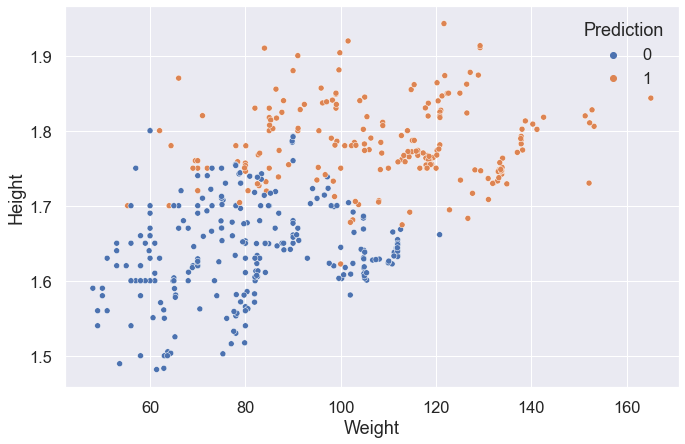

In [61]:
plt.subplots(figsize = (11,7))
sns.scatterplot(data=X_test_2,x='Weight', y='Height', hue='Prediction')

In [62]:
print('Count of observations by Prediction and Class')
X_test_2.groupby(['Prediction','NewClass'])['NewClass'].count()


Count of observations by Prediction and Class


Prediction  NewClass
0           0           145
            1           120
1           0            62
            1           133
Name: NewClass, dtype: int64

In [63]:
print('Mean Weight by Prediction & Class')
X_test_2.groupby(['Prediction','NewClass'])['Weight'].mean()

Mean Weight by Prediction & Class


Prediction  NewClass
0           0            68.689637
            1            96.057206
1           0            83.944109
            1           120.304707
Name: Weight, dtype: float64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Normal_Weight'),
  Text(1, 0, 'Obesity_Type_II'),
  Text(2, 0, 'Obesity_Type_I'),
  Text(3, 0, 'Overweight_Level_II'),
  Text(4, 0, 'Obesity_Type_III'),
  Text(5, 0, 'Overweight_Level_I')])

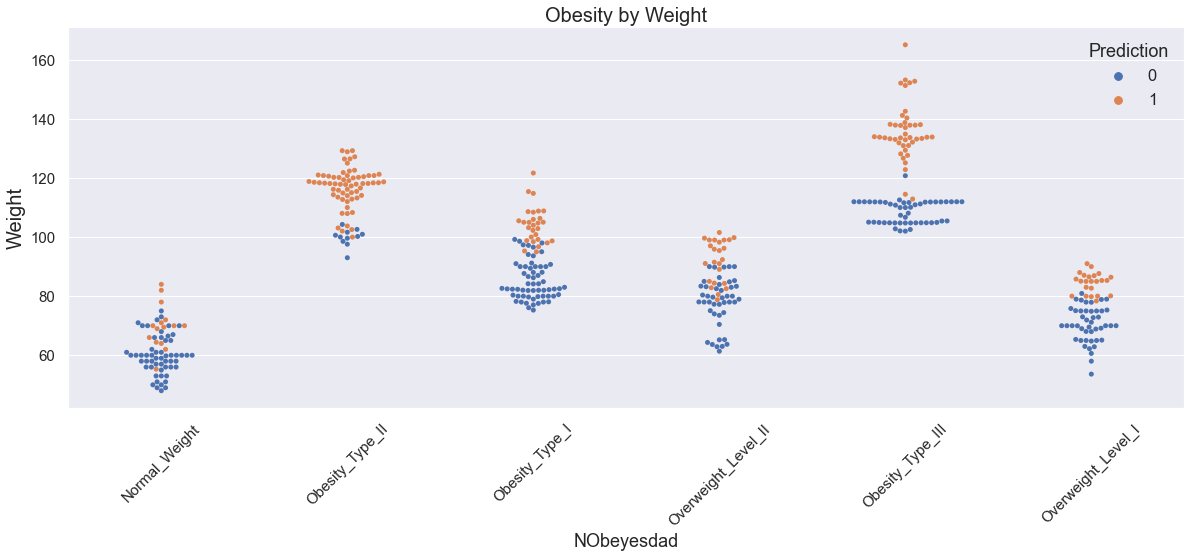

In [64]:
plt.subplots(figsize = (20,7))
sns.swarmplot(x="NObeyesdad",y="Weight", data=X_test_2, hue='Prediction')
plt.title("Obesity by Weight", fontsize=20)
plt.ylabel("Weight", fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(rotation=45, fontsize=15)

From the above, we can observe that K modes worked quite well to identify individuals that are obese and not obese

### Question 5:
c. Can you design and develop any other model for solving this problem? If so, then why have you used the reported one? Give your justification.

In [65]:
#Split data to train test and prepare dataframe by dropping target variables

X_train_m2, X_test_m2, = train_test_split(qn5df2,test_size=0.25, random_state=25)


X_test_2_m2 = X_test_m2.copy()

Y_train_m2 = X_train_m2[['NewClass']].copy()
Y_test_m2 = X_test_m2[['NewClass']].copy()
X_train_m2 = X_train_m2.drop(['NObeyesdad', 'NewClass'], axis = 1)
X_test_m2 = X_test_m2.drop(['NObeyesdad', 'NewClass'], axis = 1)

y_trainlabel_m2 = Y_train_m2['NewClass']
y_testlabel_m2 = Y_test_m2['NewClass']

In [66]:
#Scaling numerical data & Categorical Data using get dummies
numlist = X_train_m2.select_dtypes(include = ['int64','float64']).columns
catlist = X_train_m2.select_dtypes(include = ['object','category']).columns
catlist2 = X_test_m2.select_dtypes(include = ['object','category']).columns

sc = StandardScaler()
X_train_m2[numlist] = sc.fit_transform(X_train_m2[numlist])

X_test_m2[numlist] = sc.fit_transform(X_test_m2[numlist])

In [67]:
X_train_m2 = pd.get_dummies(X_train_m2, columns=catlist)
X_test_m2 = pd.get_dummies(X_test_m2, columns=catlist2)

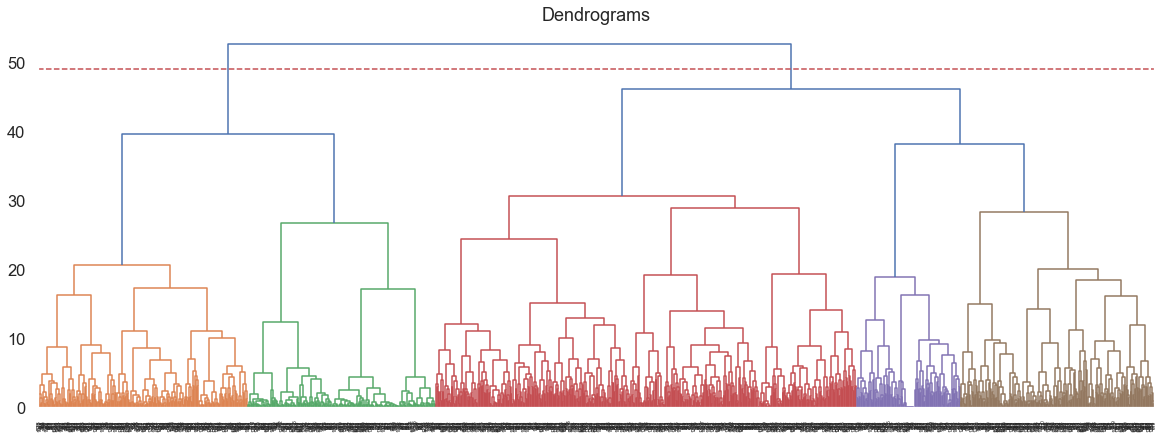

In [68]:
#plot clusters to visualise cluster distribution, we can observe 2 main clusters there
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(X_train_m2, method='ward'))
plt.axhline(y=49, color='r', linestyle='--')

In [69]:
#initiate Agglomerative clustering algorithm and fit with train dataset and test with test dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hc = hc.fit(X_train_m2)
hcpredtr = hc.fit_predict(X_train_m2)
hcpred = hc.fit_predict(X_test_m2)

In [70]:
X_test_2_m2 ['NewClass'] = Y_test_m2['NewClass']
X_test_2_m2 ['hcpred'] = hcpred
X_test_2_m2 

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,NewClass,hcpred
494,Female,18.000000,1.670000,66.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,0,1
1546,Male,25.298400,1.827279,120.996074,yes,yes,3.000000,3.000000,Sometimes,no,3.000000,no,1.110215,0.396352,Sometimes,Public_Transportation,Obesity_Type_II,1,1
1300,Female,22.591026,1.650012,87.676154,yes,yes,2.983851,1.068443,Sometimes,no,2.854161,no,1.103209,1.000000,no,Public_Transportation,Obesity_Type_I,1,1
1109,Male,37.492444,1.835024,92.368359,yes,yes,2.000000,1.672706,Sometimes,no,2.766674,no,1.000000,0.027093,Sometimes,Automobile,Overweight_Level_II,0,0
110,Male,21.000000,1.750000,75.000000,yes,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643,Male,28.493397,1.817572,120.815800,yes,yes,2.969233,3.000000,Sometimes,no,2.807984,no,0.982134,1.191998,Sometimes,Public_Transportation,Obesity_Type_II,1,1
2036,Female,25.992898,1.638075,105.036522,yes,yes,3.000000,3.000000,Sometimes,no,2.419153,no,0.019404,0.597626,Sometimes,Public_Transportation,Obesity_Type_III,1,0
1852,Female,21.700748,1.789555,137.767787,yes,yes,3.000000,3.000000,Sometimes,no,2.832659,no,1.505775,0.923005,Sometimes,Public_Transportation,Obesity_Type_III,1,0
1739,Male,37.638102,1.750085,118.114184,yes,yes,2.073224,3.000000,Sometimes,no,2.024035,no,0.131371,0.000000,Sometimes,Automobile,Obesity_Type_II,1,0


In [71]:
print("Test Data Set Results")

print("    ")
print(classification_report(y_testlabel_m2,hcpred))

print("    ")
print("Training Results")

print("    ")
print(classification_report(y_trainlabel_m2,hcpredtr))

Test Data Set Results
    
              precision    recall  f1-score   support

           0       0.20      0.20      0.20       207
           1       0.35      0.35      0.35       253

    accuracy                           0.28       460
   macro avg       0.27      0.27      0.27       460
weighted avg       0.28      0.28      0.28       460

    
Training Results
    
              precision    recall  f1-score   support

           0       0.70      0.95      0.81       660
           1       0.93      0.64      0.76       719

    accuracy                           0.79      1379
   macro avg       0.82      0.79      0.78      1379
weighted avg       0.82      0.79      0.78      1379



In [72]:
print("Test Fowlkes Mallows Score is "+ str((fowlkes_mallows_score(y_testlabel_m2, hcpred))))
print("  ")

print("Train Fowlkes Mallows Score is "+ str((fowlkes_mallows_score(y_trainlabel_m2, hcpredtr))))

Test Fowlkes Mallows Score is 0.5971606460380143
  
Train Fowlkes Mallows Score is 0.676613346581987


<AxesSubplot:xlabel='Weight', ylabel='Height'>

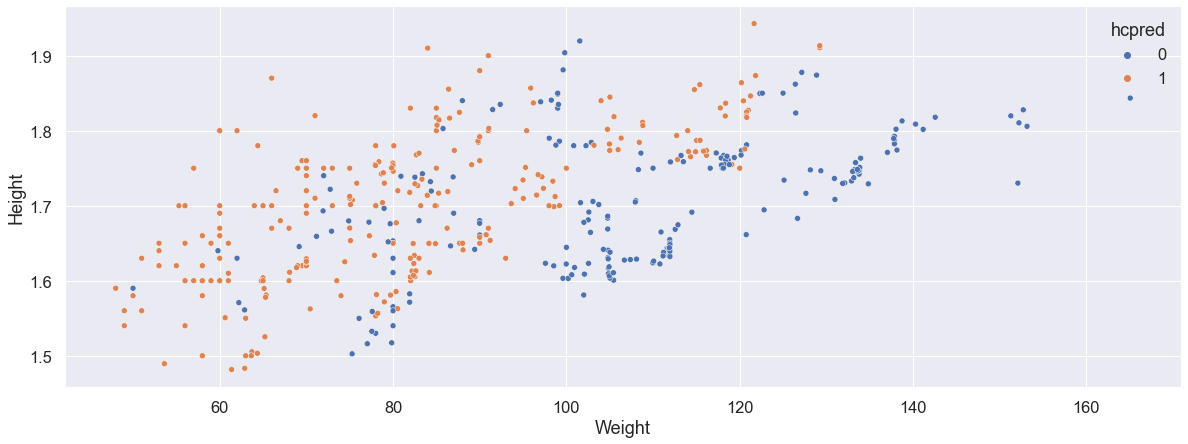

In [73]:
plt.subplots(figsize = (20,7))
sns.scatterplot(data=X_test_2_m2 ,x='Weight', y='Height', hue='hcpred')

We can see the distribution between Obese and non obese is not as obvious for this method compared to K modes algorithm

In [74]:
print('Number of observations by Prediction & Class')
X_test_2_m2.groupby(['hcpred','NewClass'])['NewClass'].count()

Number of observations by Prediction & Class


hcpred  NewClass
0       0            41
        1           164
1       0           166
        1            89
Name: NewClass, dtype: int64

In [75]:
print('Mean Weight by Prediction & Class')
X_test_2_m2.groupby(['hcpred','NewClass'])['Weight'].mean()

Mean Weight by Prediction & Class


hcpred  NewClass
0       0            81.133446
        1           113.149359
1       0            71.313619
        1           100.796584
Name: Weight, dtype: float64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Normal_Weight'),
  Text(1, 0, 'Obesity_Type_II'),
  Text(2, 0, 'Obesity_Type_I'),
  Text(3, 0, 'Overweight_Level_II'),
  Text(4, 0, 'Obesity_Type_III'),
  Text(5, 0, 'Overweight_Level_I')])

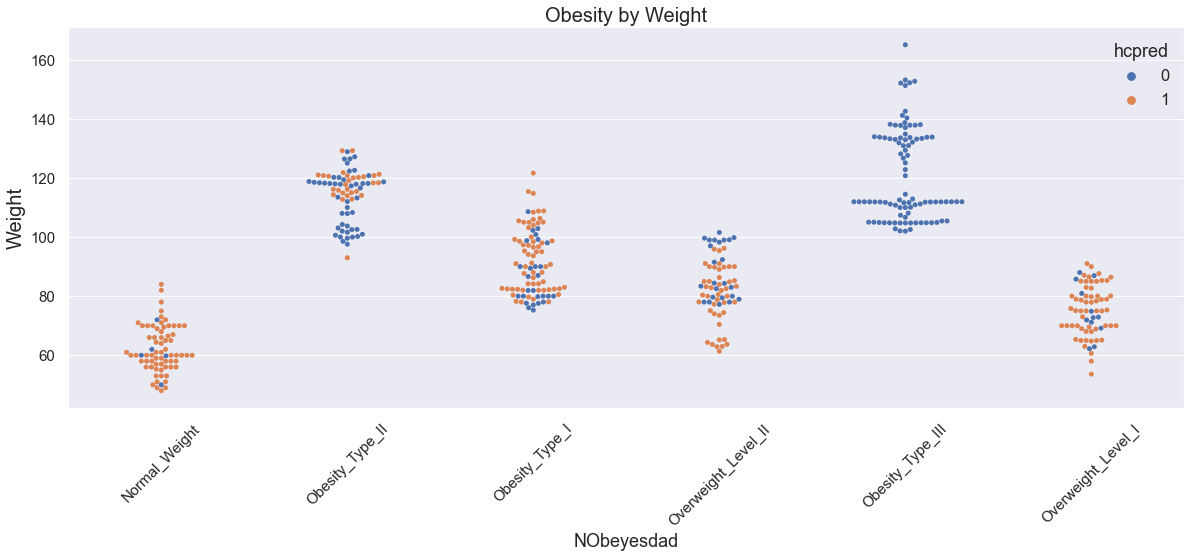

In [76]:
plt.subplots(figsize = (20,7))
sns.swarmplot(x="NObeyesdad",y="Weight",data=X_test_2_m2,hue='hcpred')
plt.title("Obesity by Weight", fontsize=20)
plt.ylabel("Weight", fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(rotation=45, fontsize=15)